In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:
df.shape

(5000, 13)

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In [ ]:
# Continuous (numeric, not strictly binary)
continuous_features = df.loc[:, df.apply(lambda col: pd.api.types.is_numeric_dtype(col) and col.nunique() > 2)].columns

# Binary features (numeric, only two unique values: 0/1 or yes/no encoded)
binary_features = df.loc[:, df.apply(lambda col: pd.api.types.is_numeric_dtype(col) and col.nunique() == 2)].columns

print("Continuous features:", list(continuous_features))
print("Binary features:", list(binary_features))

Continuous features: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Binary features: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']


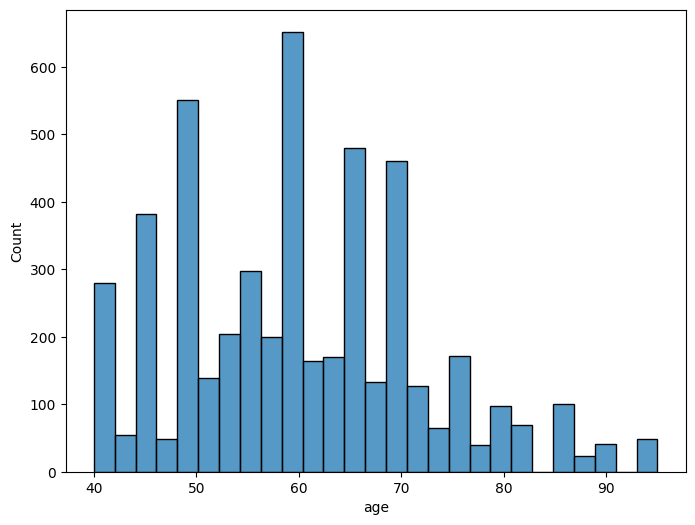

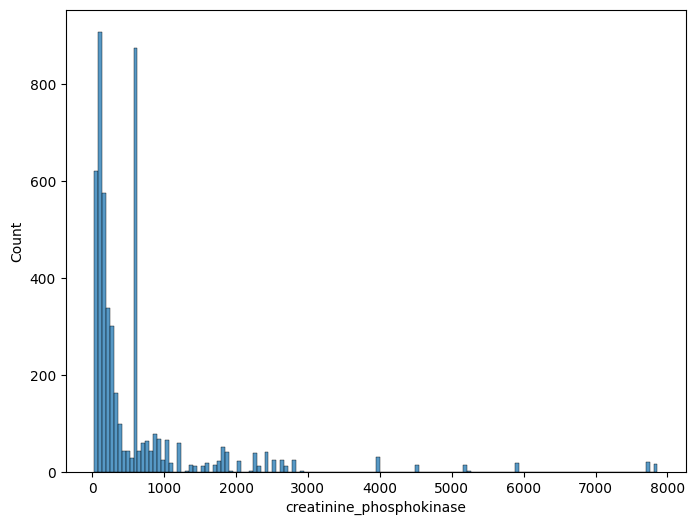

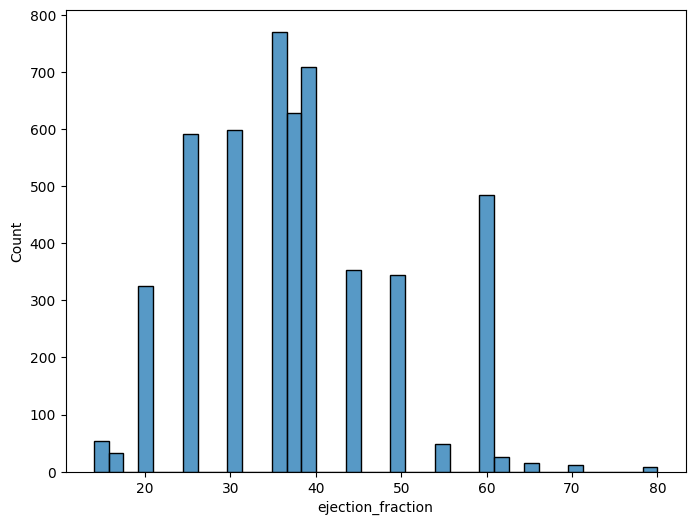

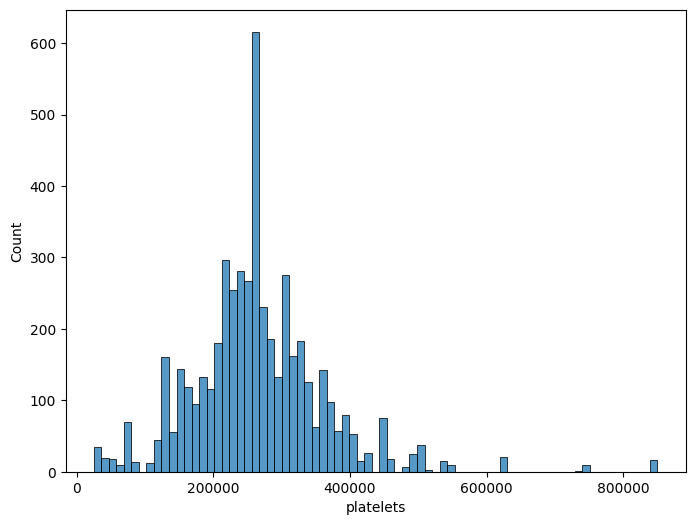

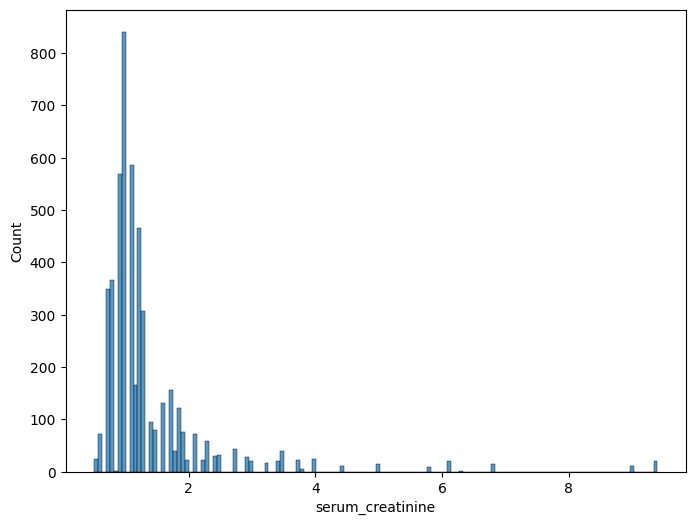

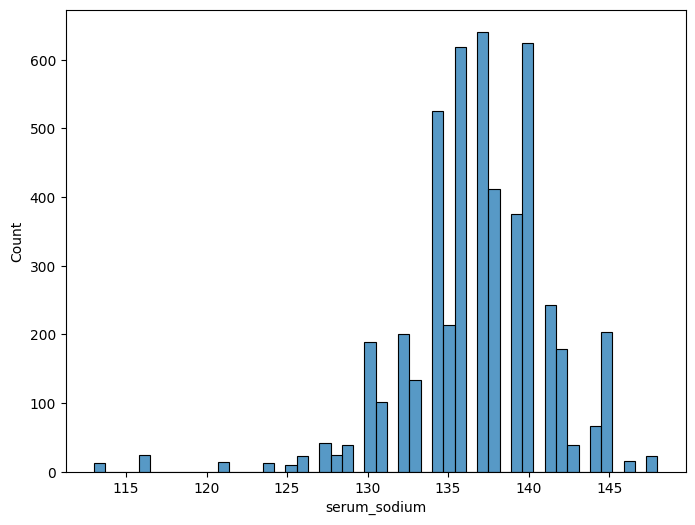

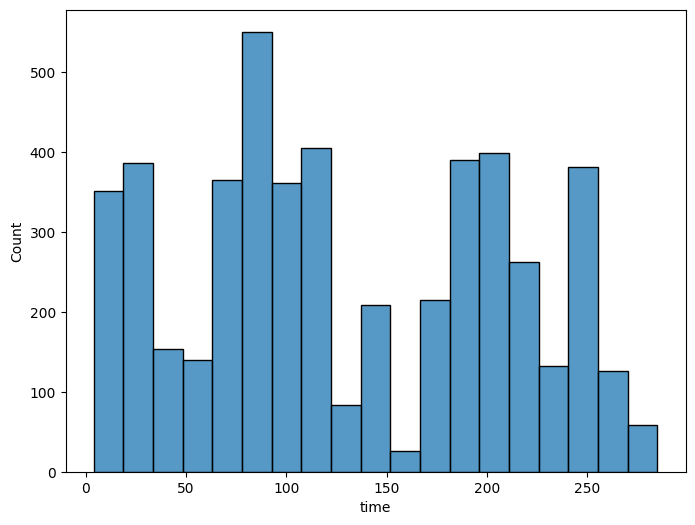

In [12]:
for x in continuous_features:
    plt.figure(figsize=(8,6))
    sns.histplot(df[x])

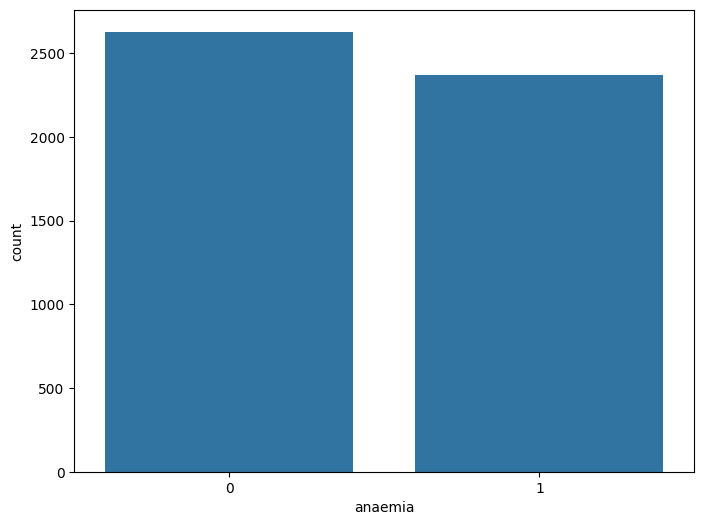

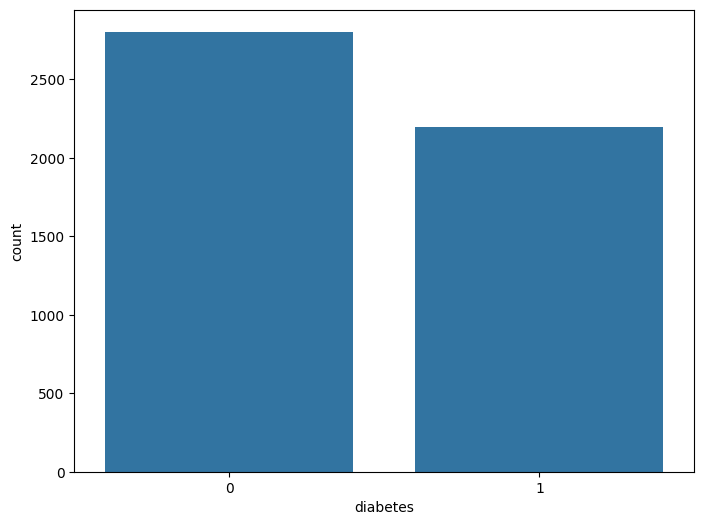

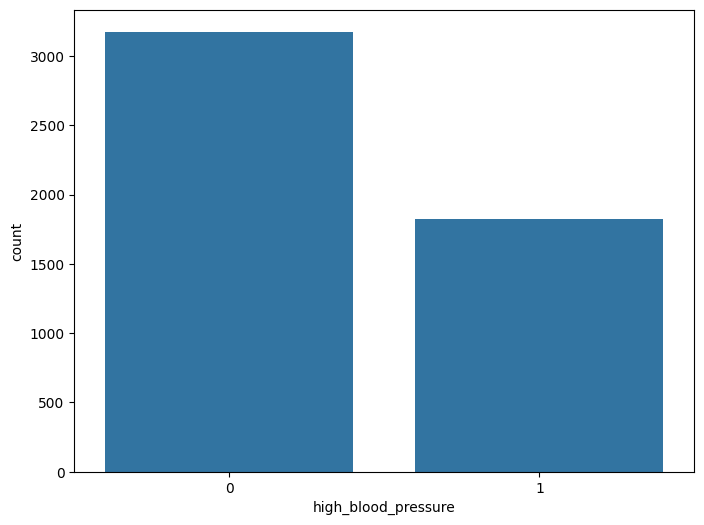

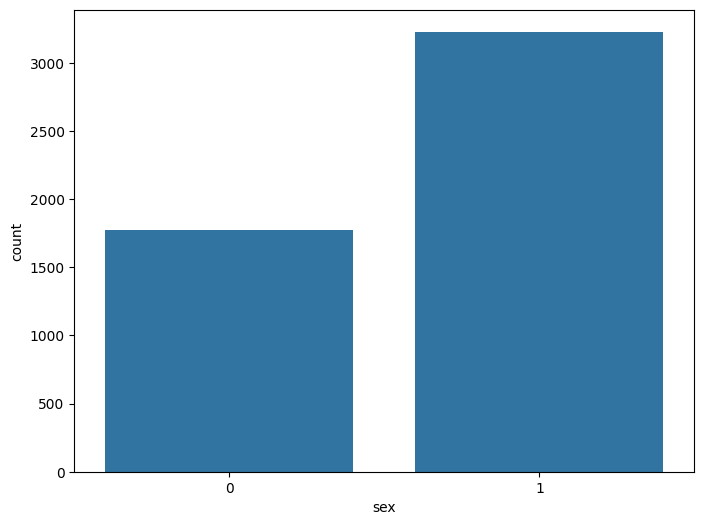

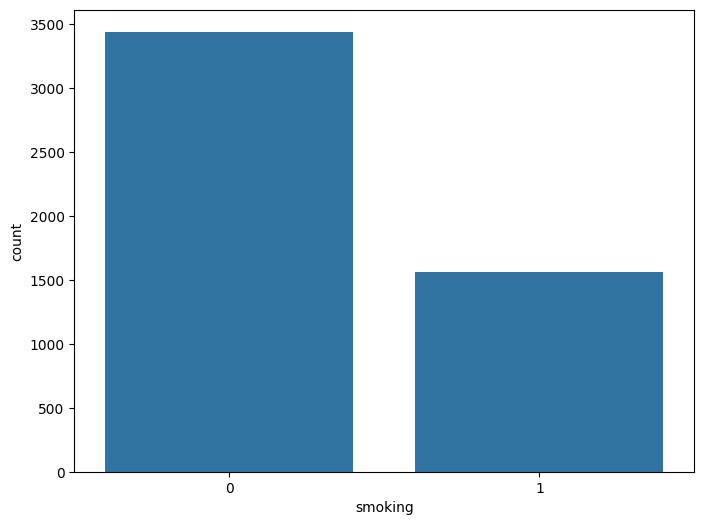

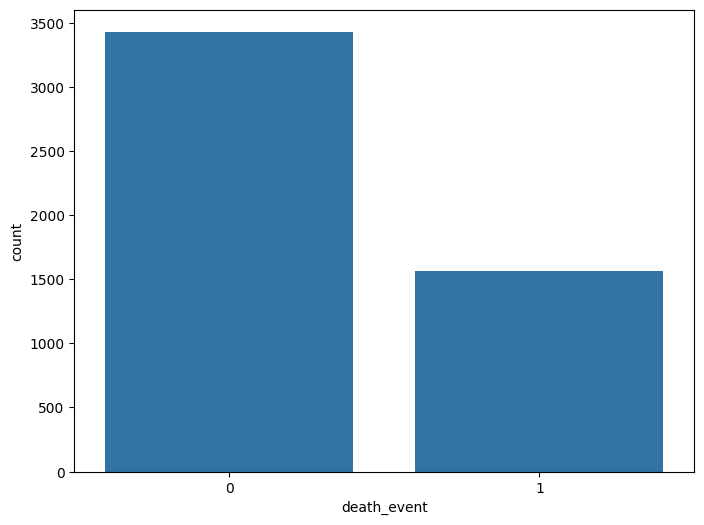

In [15]:
for x in binary_features:
    plt.figure(figsize=(8,6))
    sns.barplot(df[x].value_counts())